* [1. Libraries And Dataset](#1.-Libraries-And-Dataset)
  * [1.1 Libraries](#1.1-Libraries)
  * [1.2 Dataset](#1.2-Dataset)
* [2. Data Exploration](#2.-Data-Exploration)
  * [2.1 Word Count](#2.1-Word-Count)
  * [2.2 Word Frequency](#2.2-Word-Frequency)
  * [2.3 Word Cloud](#2.3-WordCloud)
  * [2.4 Check Target](#2.4-Check-Target)
  * [2.5 Duplicated Values](#2.5-Duplicated-Values)
  * [2.6 Missing Values](#2.6-Missing-Values)
  * [2.7 Language Detection](#2.7-Language-Detection)
     * [2.7.1. Description Languages](#2.7.1-Description-Languages)
     * [2.7.2. Host Languages](#2.7.2-Host-Languages)
     * [2.7.3. Review Languages](#2.7.3-Review-Languages)
* [3. Data Cleaning](#3.-Data-Cleaning)
  * [3.1. Stop Words](#3.1-Stop-Words)
  * [3.2. Special Characters](#3.2-Special-Characters)
  * [3.3. Spell Checking (EXTRA)](#3.3-Spell-Checking-(EXTRA))
  * [3.4. Emoji Checking (EXTRA)](#3.4-Emoji-Checking-(EXTRA))
  * [3.5. Stemmer](#3.5-Stemmer)
  * [3.6. Contractions Words (EXTRA)](#3.6-Contractions-Words-(EXTRA))
  * [3.7. Lemmatization](#3.7-Lemmatization)
* [4. Data Preprocessing](#4.-Data-Preprocessing)
* [5. Clean Data Analysis](#5.-Clean-Data-Analysis)

## 1. Libraries And Dataset

### 1.1 Libraries

In [ ]:
##

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from langdetect import detect
from spellchecker import SpellChecker
from wordcloud import WordCloud
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from spellchecker import SpellChecker
import langcodes
import nltk
import contractions
import string
from tqdm import tqdm
from langdetect.lang_detect_exception import LangDetectException

from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from torch.utils.data import Dataset, DataLoader
import torchtext.vocab as vocab
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold, cross_validate
#from gensim.models import Word2Vec
import multiprocessing
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from utils import *
import os

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('snowball_data')

/Users/burcuyesilyurt/opt/anaconda3/envs/main/lib/python3.11/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/Users/burcuyesilyurt/opt/anaconda3/envs/main/lib/python3.11/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/burcuyesilyurt/nltk_d

True

In [2]:
#!pip install matplotlib seaborn numpy pandas scikit-learn nltk langdetect pyspellchecker wordcloud emoji langcodes textblob contractions tqdm torch gensim
#!pip install --upgrade torchtext

In [3]:
path = os.path.abspath(os.getcwd())
data_path = os.path.join(path, 'Project Corpora')

### 1.2 Dataset

In [4]:
df_train = pd.read_excel(os.path.join(data_path, 'train.xlsx'), index_col='index')
df_test = pd.read_excel(os.path.join(data_path, 'test.xlsx'), index_col='index')

In [5]:
df_train_reviews = pd.read_excel(os.path.join(data_path, 'train_reviews.xlsx'))
df_test_reviews = pd.read_excel(os.path.join(data_path, 'test_reviews.xlsx'))

In [6]:
df_train_reviews["comments"] = df_train_reviews["comments"].astype(str)
df_train["description"] = df_train["description"].astype(str)
df_train["host_about"] = df_train["host_about"].astype(str)

In [7]:
print(df_train.shape)
df_train.head(3)

(6248, 3)


description  \
index                                                      
1      This is a shared mixed room in our hostel, wit...   
2      O meu espaço fica perto de Parque Eduardo VII,...   
3      Trafaria’s House is a cozy and familiar villa ...   

                                              host_about  unlisted  
index                                                               
1                    Alojamento Local Registro: 20835/AL         0  
2      I am friendly host, and I will try to always b...         1  
3      I am a social person liking to communicate, re...         1

In [8]:
print(df_train_reviews.shape)
df_train_reviews.head(3)

(361281, 2)


index                                           comments
0      1  this is a very cozy and comfortable house to s...
1      1                                          good<br/>
2      1  My first hostel experience, and all I have to ...

In [9]:
print( '# null values comments train:',df_train_reviews['comments'].isna().sum())
print( '# null values description train:',df_train['description'].isna().sum())
print( '# null values host_about train:',df_train['host_about'].isna().sum())

# null values comments train: 0
# null values description train: 0
# null values host_about train: 0


In [10]:
df_train_reviews['word_count']  = df_train_reviews['comments'].apply(lambda x: len(str(x).split()))
df_train_reviews[['comments','word_count']].head()

comments  word_count
0  this is a very cozy and comfortable house to s...          28
1                                          good<br/>           1
2  My first hostel experience, and all I have to ...         261
3  Das Hostel war neu und deshalb funktionierte a...          81
4  It was fine for a dorm, but I think for the pe...          27

In [11]:
df_train['word_count_description']  = df_train['description'].apply(lambda x: len(str(x).split()))
df_train.sort_values(by='word_count_description', ascending=False).head(3)

description  \
index                                                      
2047   Sunny apartment 10 m from beach and train stat...   
4473   You will come to find a renovated apartment in...   
5631   This is a room suitable for one or two persons...   

                                              host_about  unlisted  \
index                                                                
2047   i am outgoing and friendly, love to travel and...         1   
4473   Brazillian living in Zagreb now. Want to explo...         0   
5631   Hi I'm from Lisbon Portugal. I love to travel ...         0   

       word_count_description  
index                          
2047                      196  
4473                      194  
5631                      194

In [12]:
df_train['word_count_host']  = df_train['host_about'].apply(lambda x: len(str(x).split()))
df_train.sort_values(by='word_count_host', ascending=False).head(3)

description  \
index                                                      
2245   Gather in the large skylit living room where m...   
5201   Nice Caravan, recently restored , in beautiful...   
3951   place to chill, to be yourself ! pure nature,s...   

                                              host_about  unlisted  \
index                                                                
2245   Travel is life ! I love meeting people and hel...         0   
5201   life is so much more then nice words and so ca...         0   
3951   life is so much more then nice words and so ca...         0   

       word_count_description  word_count_host  
index                                           
2245                      121             1408  
5201                       88              819  
3951                      154              819

## 2. Data Exploration

### 2.1 Word Count

Before start, we need to check our dataset. First we checked word frequency.

In [13]:
print('Description of word count in reviews column')
print(df_train_reviews.word_count.describe()) 

print('\n') 
print('Description of word count in host column')
print(df_train.word_count_host.describe())

print('\n') 
print('Description of word count in description column')
print(df_train.word_count_description.describe())

Description of word count in reviews column
count    361281.000000
mean         47.587006
std          46.421132
min           1.000000
25%          17.000000
50%          35.000000
75%          63.000000
max        1001.000000
Name: word_count, dtype: float64


Description of word count in host column
count    6248.000000
mean       75.194942
std        81.384186
min         0.000000
25%        26.000000
50%        56.000000
75%       103.000000
max      1408.000000
Name: word_count_host, dtype: float64


Description of word count in description column
count    6248.000000
mean      132.119878
std        47.742357
min         3.000000
25%        99.000000
50%       156.000000
75%       166.000000
max       196.000000
Name: word_count_description, dtype: float64


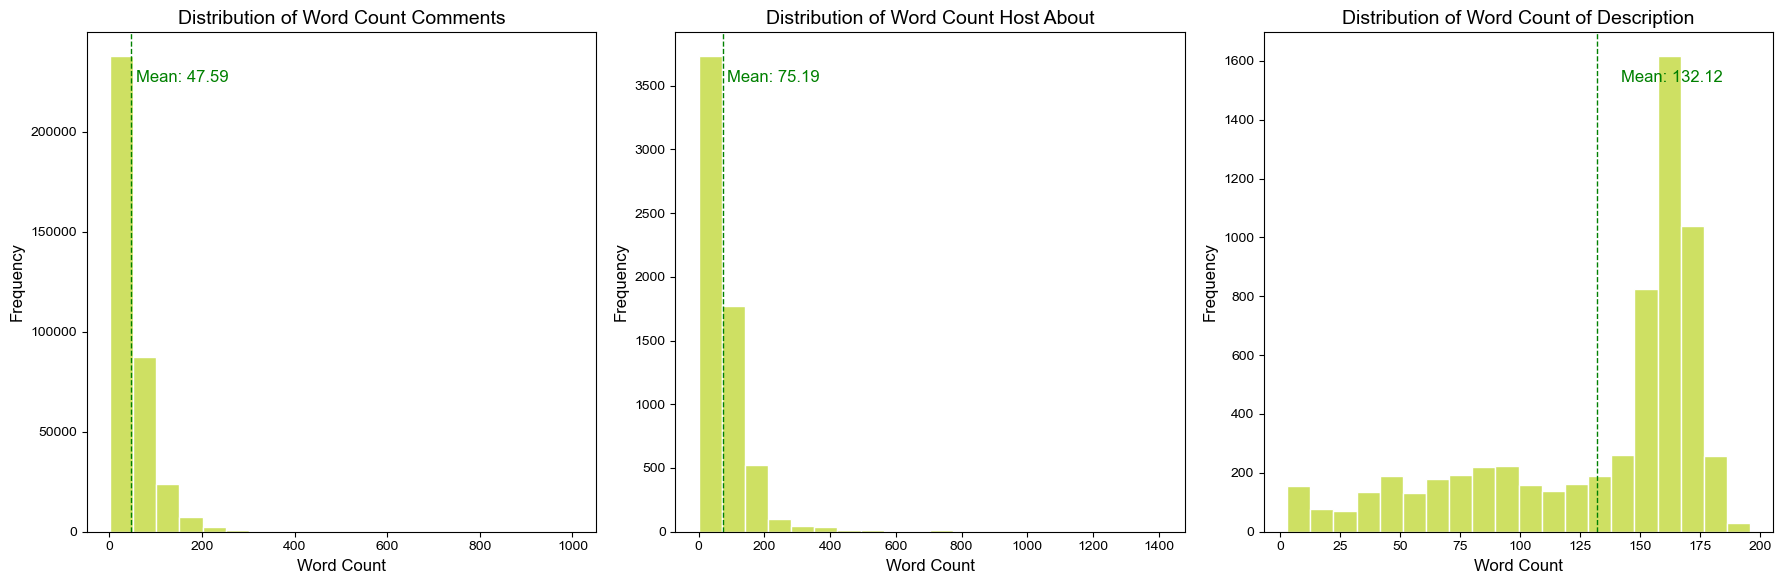

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set(style="white")

# Plot 1: Distribution of Word Count Comments
sns.histplot(df_train_reviews['word_count'], bins=20, color='#BED62F', ax=axes[0])
axes[0].set_xlabel('Word Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Word Count Comments', fontsize=14)
mean_word_count_reviews = df_train_reviews['word_count'].mean()
axes[0].axvline(mean_word_count_reviews, color='green', linestyle='--', linewidth=1)
axes[0].text(mean_word_count_reviews + 10, axes[0].get_ylim()[1]*0.9, f'Mean: {mean_word_count_reviews:.2f}', color='green', fontsize=12)

# Plot 2: Distribution of Word Count Host About
sns.histplot(df_train['word_count_host'], bins=20, color='#BED62F', ax=axes[1])
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Word Count Host About', fontsize=14)
mean_word_count_host = df_train['word_count_host'].mean()
axes[1].axvline(mean_word_count_host, color='green', linestyle='--', linewidth=1)
axes[1].text(mean_word_count_host + 10, axes[1].get_ylim()[1]*0.9, f'Mean: {mean_word_count_host:.2f}', color='green', fontsize=12)

# Plot 3: Distribution of Word Count of Description
sns.histplot(df_train['word_count_description'], bins=20, color='#BED62F', ax=axes[2])
axes[2].set_xlabel('Word Count', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Distribution of Word Count of Description', fontsize=14)
mean_word_count_description = df_train['word_count_description'].mean()
axes[2].axvline(mean_word_count_description, color='green', linestyle='--', linewidth=1)
axes[2].text(mean_word_count_description + 10, axes[2].get_ylim()[1]*0.9, f'Mean: {mean_word_count_description:.2f}', color='green', fontsize=12)

plt.tight_layout()
plt.show()

### 2.2 Word Frequency

In [15]:
all_words_rewiews = ' '.join(df_train_reviews['comments']).split()
freq_reviews = pd.Series(all_words_rewiews).value_counts()
print(freq_reviews.sort_values(ascending=False)[0:10]) 

print('\n') 
all_words_host_about = ' '.join(df_train['host_about']).split()
freq_host_about = pd.Series(all_words_host_about).value_counts()
print(freq_host_about.sort_values(ascending=False)[0:10])

print('\n') 
all_words_description = ' '.join(df_train['description']).split()
freq_description = pd.Series(all_words_description).value_counts()
print(freq_description.sort_values(ascending=False)[0:10])


and     553157
the     515963
a       398631
to      328675
is      258191
in      249469
was     239807
of      174087
very    156654
The     143987
Name: count, dtype: int64


and    16358
to     13291
the    10797
a      10535
in      9860
of      6524
I       6419
you     6248
de      4325
We      4206
Name: count, dtype: int64


the      31323
and      27698
a        25540
/><br    17380
to       15328
of       15122
in       13866
with     13649
is       12083
de        6918
Name: count, dtype: int64


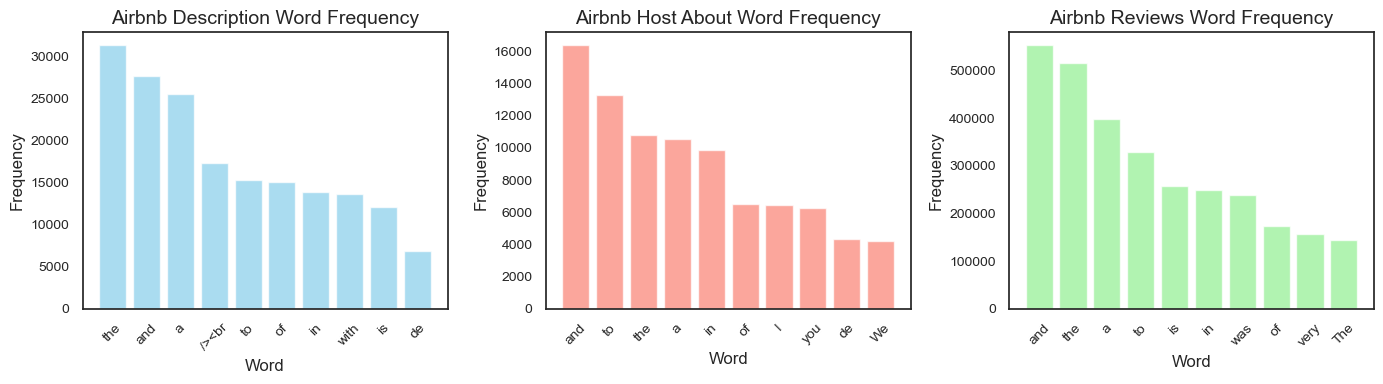

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), facecolor='none')

description_words = ' '.join(df_train['description']).split()
host_about_words = ' '.join(df_train['host_about']).split()
comments_words = ' '.join(df_train_reviews['comments']).split()

word_freq(description_words, 'Airbnb Description Word Frequency', 0, 'skyblue', axes)
word_freq(host_about_words, 'Airbnb Host About Word Frequency', 1, 'salmon', axes)
word_freq(comments_words, 'Airbnb Reviews Word Frequency', 2, 'lightgreen', axes)
plt.tight_layout()
plt.show()

When we checked most common words, we saw some strange charachters used a lot. In preprocessing step, we will clean them.

### 2.3 WordCloud

You can also see that in wordcloud 

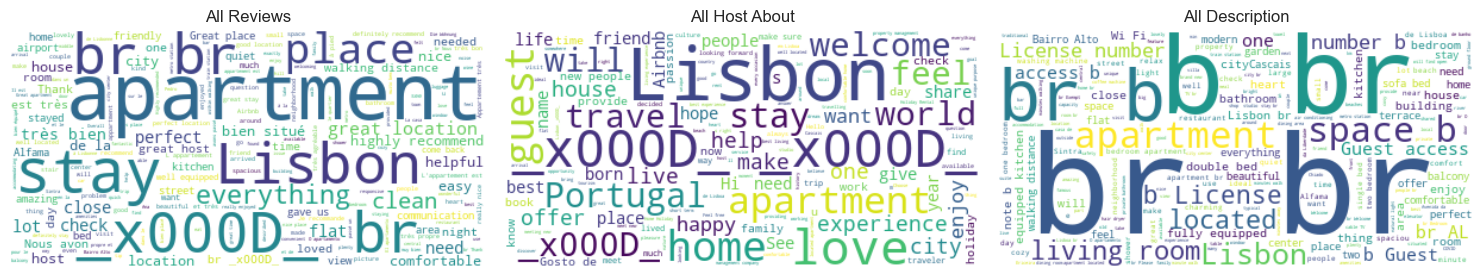

In [17]:
# Define the text sources
text_sources = {
        'All Reviews': ' '.join(df_train_reviews['comments']),
        'All Host About': ' '.join(df_train['host_about']),
        'All Description': ' '.join(df_train['description'])
    }

wordCloud(text_sources)

### 2.4 Check Target

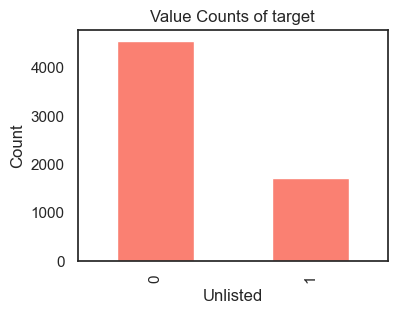

In [18]:
sns.set_style("white")
plt.figure(figsize=(4, 3))
df_train['unlisted'].value_counts().plot(kind='bar', width=0.5, color='salmon')
plt.xlabel('Unlisted')
plt.ylabel('Count')
plt.title('Value Counts of target')
plt.show()

### 2.5 Duplicated Values

In [19]:
df_train[df_train.duplicated()].head(5)

description  \
index                                                      
232    Nesha Guesthouse Lisbon is a surf & beach orie...   
550    We are The Salty Pelican Yoga & Surf Retreat. ...   
726    Hospede-se em um local privilegiado e aconcheg...   
977    This gorgeous and spacious room located right ...   
993    Located in the heart of Lisbon (in the histori...   

                                              host_about  unlisted  \
index                                                                
232    I'm an enthusiastic and active person who love...         0   
550    Hello… We are The Salty Pelican Surf & Yoga Re...         0   
726    Life is to be lived, good friends, good food, ...         0   
977    Olá ! Sou a Carmo - vivo em Lisboa na Lapa bai...         0   
993    Founded by travel enthusiasts (just like you) ...         1   

       word_count_description  word_count_host  
index                                           
232                       177              202  
550                       178              189  
726                        80               19  
977                       148               75  
993                       173               72

In [20]:
df_train[(df_train['description'].duplicated()) & (~df_train.duplicated())].head(5)

description  \
index                                      
1354   <b>License number</b><br />Exempt   
1834   <b>License number</b><br />Exempt   
1870   <b>License number</b><br />Exempt   
1876   <b>License number</b><br />Exempt   
1879   <b>License number</b><br />Exempt   

                                              host_about  unlisted  \
index                                                                
1354   Profissional e responsável. Sempre disponível....         1   
1834   Spiritualistic Artist, half Brazilian from the...         0   
1870   Erlebe und lebe die einzigartige Erfahrung mit...         0   
1876   Acessível E Receptivo Sempre disponível para o...         0   
1879   I am 27 years Old, i am Portuguese, I love my ...         1   

       word_count_description  word_count_host  
index                                           
1354                        3                6  
1834                        3              105  
1870                        3               25  
1876                        3               11  
1879                        3               22

In [21]:
df_train[df_train['host_about'].duplicated() & (~df_train.duplicated())].head(5)

description  \
index                                                      
21     IMPORTANT: In response to COVID-19, this prope...   
48     Hello traveler, if you are looking for the per...   
55     Spacious apartment in the heart of Lisbon. Up ...   
72     This room is elegantly and functionally decora...   
75     IMPORTANT: In response to COVID-19, this prope...   

                                              host_about  unlisted  \
index                                                                
21     Hi, we are Homing - a company that develops it...         0   
48     Hi world, my name is João Figueira, I am 35 ye...         1   
55     We are Feels Like Home Holiday Rentals.\nA com...         0   
72     Sou uma pessoa otimista que vive a vida com a ...         0   
75     Homing has become one of the largest and most ...         0   

       word_count_description  word_count_host  
index                                           
21                        155               97  
48                        157              172  
55                        162              114  
72                        173              285  
75                        161               65

In [22]:
print('unique values for host_about: ', df_train['host_about'].nunique())
print('unique values for description: ', df_train['description'].nunique())

unique values for host_about:  2803
unique values for description:  6023


In [23]:
print('unique values for comments: ', df_train_reviews['comments'].nunique())
df_train_reviews[df_train_reviews['comments'].duplicated()].head(5)

unique values for comments:  354500


index      comments  word_count
682      16             .           1
822      19             👍           1
1001     23  Great place!           2
1244     25             .           1
1651     31             .           1

### 2.6 Missing Values

In [24]:
print('Missing values in descriptions:', df_train['description'].isna().sum())
print('Missing values in host_about: ', df_train['host_about'].isna().sum())
print('Missing values in reviews:', df_train_reviews['comments'].isna().sum())

Missing values in descriptions: 0
Missing values in host_about:  0
Missing values in reviews: 0


### 2.7 Analyzing Dataset before Cleaning

In [25]:
df_train[df_train['description'].str.startswith('<b>License number</b><br />')].head(5)

description  \
index                                        
282    <b>License number</b><br />43084/AL   
654    <b>License number</b><br />37710/AL   
714    <b>License number</b><br />92019/AL   
747      <b>License number</b><br />Exempt   
900     <b>License number</b><br />6005/al   

                                              host_about  unlisted  \
index                                                                
282    A GalanteVasques Luxury Tourism nasceu da vont...         0   
654    Gosto de praia, espectaculos, musica e gastron...         1   
714    I'm chronic nomad since 2008, currently live i...         1   
747                                 Honesta e atenciosa          0   
900    Ola, sou o Vagner amo viajar,  trabalho bastan...         0   

       word_count_description  word_count_host  
index                                           
282                         3               63  
654                         3               18  
714                         3              159  
747                         3                3  
900                         3               24

In [26]:
df_train_reviews.groupby('index').count()['comments'].describe()

count    4245.000000
mean       85.107420
std        96.486697
min         1.000000
25%        17.000000
50%        48.000000
75%       124.000000
max       891.000000
Name: comments, dtype: float64

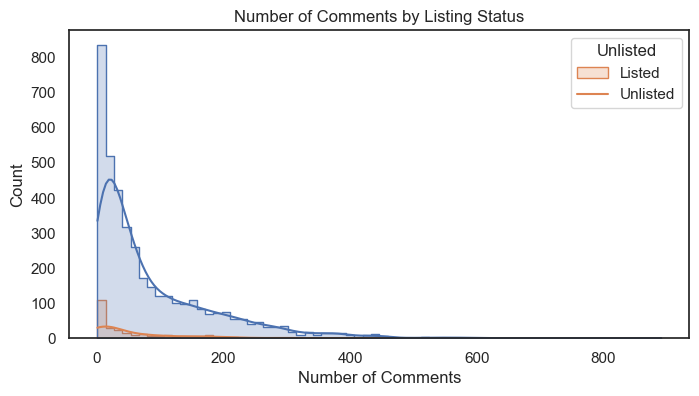

In [27]:
comments_count = df_train_reviews.groupby('index').count()['comments'].reset_index()
comments_count.rename(columns={'comments': 'comments_count'}, inplace=True)

# Merge df_train_reviews with df_train based on the index
merged_df = df_train.merge(comments_count, left_index=True, right_on='index')

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(data=merged_df, x='comments_count', hue='unlisted', element='step', kde=True)
plt.xlabel('Number of Comments')
plt.ylabel('Count')
plt.title('Number of Comments by Listing Status')
plt.legend(title='Unlisted', labels=['Listed', 'Unlisted'])
plt.show()

In [28]:
merged_df = df_train_reviews.merge(df_train, left_on='index', right_index=True)
unlisted_counts = merged_df.groupby('unlisted').count()['comments']

In [29]:
# Convert 'unlisted' column to boolean
df_train['unlisted'] = df_train['unlisted'].astype(bool)

# Merge the datasets and calculate the count of 'comments' grouped by 'unlisted'
grouped = df_train_reviews.merge(df_train, left_on='index', right_index=True)\
                          .groupby('unlisted')['comments'].count()

# Calculate the average comments for 'unlisted' and 'listed' properties
average_unlisted = grouped[True] / df_train['unlisted'].sum()
average_listed = grouped[False] / (~df_train['unlisted']).sum()

In [30]:
df_train_reviews

index                                           comments  word_count
0           1  this is a very cozy and comfortable house to s...          28
1           1                                          good<br/>           1
2           1  My first hostel experience, and all I have to ...         261
3           1  Das Hostel war neu und deshalb funktionierte a...          81
4           1  It was fine for a dorm, but I think for the pe...          27
...       ...                                                ...         ...
361276   6248  The location was perfect. The apartment was ve...         131
361277   6248  Ana's place is exactly as described and even b...          80
361278   6248  A Ana foi muito atenciosa e preocupou se com o...          23
361279   6248  No wifi nor answer. <br/>The wifi can’t be con...          20
361280   6248  O espaço é ótimo, a D. Ana foi maravilhosa e f...          41

[361281 rows x 3 columns]

In [31]:
properties_no_comments = df_train[~df_train.index.isin(df_train_reviews['index'])]

# Calculate the counts of unlisted and listed properties with no comments
no_comments_unlisted = properties_no_comments[properties_no_comments['unlisted'] == 1].shape[0]
no_comments_listed = properties_no_comments[properties_no_comments['unlisted'] == 0].shape[0]

# Calculate the total counts of unlisted and listed properties in the first dataset
unlisted_total = df_train['unlisted'].sum()
listed_total = len(df_train) - unlisted_total  # Total count minus unlisted count

# Calculate and print the proportions of unlisted and listed properties with no comments
proportion_unlisted = no_comments_unlisted / unlisted_total if unlisted_total > 0 else 0
proportion_listed = no_comments_listed / listed_total if listed_total > 0 else 0

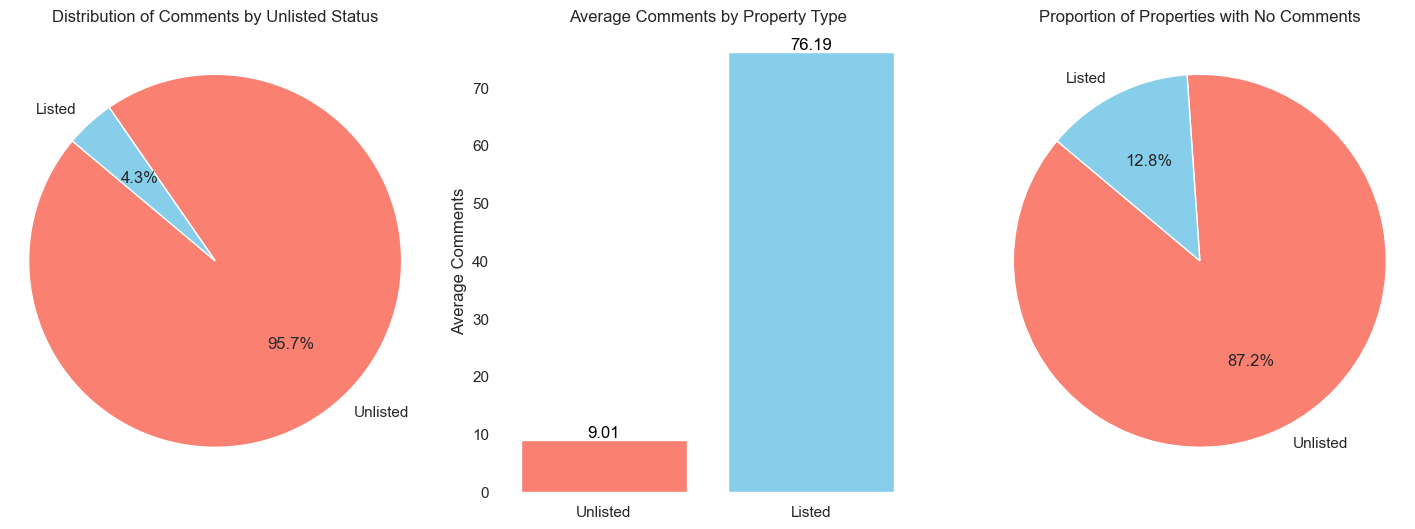

In [32]:
# Set up the figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of comments by unlisted status
axs[0].pie(unlisted_counts, labels=['Unlisted', 'Listed'], autopct='%1.1f%%', startangle=140, colors=['salmon', 'skyblue'])
axs[0].set_title('Distribution of Comments by Unlisted Status')
axs[0].axis('equal')

# Plotting the average comments for unlisted and listed properties
axs[1].bar(['Unlisted', 'Listed'], [average_unlisted, average_listed], color=['salmon', 'skyblue'])
axs[1].set_title('Average Comments by Property Type')
axs[1].set_ylabel('Average Comments')
for i, v in enumerate([average_unlisted, average_listed]):
    axs[1].text(i, v + 0.5, str(round(v, 2)), color='black', ha='center')

for spine in axs[1].spines.values():
    spine.set_visible(False)
# Plotting the proportions of unlisted and listed properties with no comments
axs[2].pie([proportion_unlisted, proportion_listed], labels=['Unlisted', 'Listed'], autopct='%1.1f%%', startangle=140, colors=['salmon', 'skyblue'])
axs[2].set_title('Proportion of Properties with No Comments')
axs[2].axis('equal')

plt.show()


### 2.7 Language Detection

#### 2.7.1 Description Languages

In [33]:
description_lang = df_train['description'].apply(lambda x: detect_lang(str(x)))

#### 2.7.2 Host Languages

In [34]:
host_lang = df_train['host_about'].apply(lambda x: detect_lang(str(x)))

#### 2.7.3 Review Languages

In [35]:
review_lang = df_train_reviews['comments'].apply(lambda x: detect_lang(str(x)))

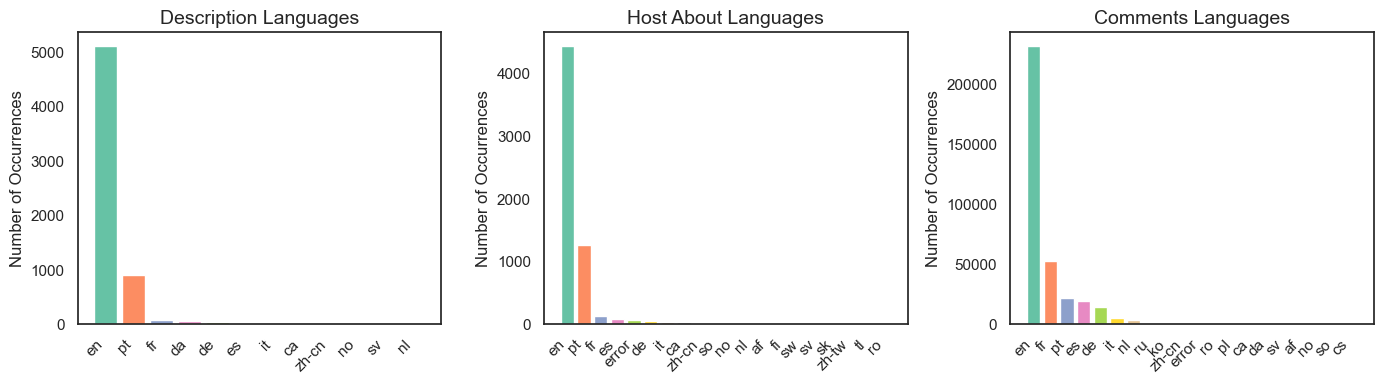

In [36]:
titles = ['Description Languages', 'Host About Languages', 'Comments Languages']
plot_top_languages_frequency(data_sources=[description_lang, host_lang, review_lang], titles=titles)

## 3. Data Cleaning

### 3.1 Stop Words

In [37]:
# Retrieve stopwords for each language
languages = stopwords.fileids()
stopwords_dict = {}
for lang in languages:
    stopwords_dict[lang] = set(stopwords.words(lang))

In [38]:

text = "This is an example sentence, written in English, to demonstrate the removal of stopwords."
result = remove_stop_words(text, languages, stopwords_dict)
print(result)

sentence, written English, demonstrate removal stopwords.


### 3.2 Special Characters

In [39]:
text = "<b>Contact me at john.doe@example.com or visit my website at https://www.example.com for more information! 200 $"
text = remove_non_alphanumeric(text)
print("Cleaned Text:", text)

Cleaned Text: Contact me at or visit my website at for more information  


### 3.3 Spell Checking (EXTRA)

The currently supported dictionaries are:
English - ‘en’
Spanish - ‘es’
French - ‘fr’
Portuguese - ‘pt’
German - ‘de’
Italian - ‘it’
Russian - ‘ru’
Arabic - ‘ar’
Basque - ‘eu’
Latvian - ‘lv’
Dutch - ‘nl'

In [40]:
corrected_sentence = spell_checking("Thiss is a sentennce with somee misspelledd wordss")
print("Corrected sentence:", corrected_sentence)

Corrected sentence: this is a sentence with some misspelled words


### 3.4 Emoji Checking (EXTRA)

For emojis we tried 2 options:
1- Replace emoji with emoji name
2- Convert Unicode

In [41]:
text = "I feel 😊🦄 today!"
emoji_text = emoji.demojize(text)
print(emoji_text) 

I feel :smiling_face_with_smiling_eyes::unicorn: today!


In [42]:
text = "I love 😊"
encoded_text = text.encode('unicode_escape').decode('utf-8')
print(encoded_text)  

I love \U0001f60a


For our dataset, replacing emoji with emoji's name is better option. But as you see, when 2 emojis are together there is no space between names. We should solve this problem. So we will put space between two "::" character

In [43]:
text = "I feel 😊🦄 today!"
replaced_text = replace_emojis_with_text(text)
print(replaced_text)  

I feel :smiling face with smiling eyes: :unicorn: today!


### 3.5 Stemmer

Here are some considerations for selecting a stemming algorithm for large datasets:
    
1- Porter Stemmer: The Porter Stemmer is widely used and relatively efficient. It's a good choice for English text and is implemented in many NLP libraries, making it easily accessible.
    
2- Snowball Stemmer: The Snowball Stemmer, also known as the Porter2 Stemmer, is an improved version of the Porter Stemmer with better performance. It supports multiple languages and is optimized for speed.
    
3- Lancaster Stemmer: The Lancaster Stemmer is known for its aggressive stemming, which can sometimes result in shorter stems compared to the Porter Stemmer. It may be faster in certain scenarios, but it's also more aggressive and may produce less accurate results.

                                                               
Snowball looks more accurated for our dataset. We have multiple languages and we don't want to be more aggressive"

In [44]:
text = "Leaves are falling from the trees in autumn."
stemmed_text = stemmer_checking(text, "en")
print(stemmed_text)

leav are fall from the tree in autumn.


In [45]:
text = "As folhas estão caindo das árvores no outono."
stemmed_text = stemmer_checking(text, "pt")
print(stemmed_text)

as folh estã caind das árvor no outono.


Stemming can be beneficial in certain scenarios:

1- Reducing Vocabulary Size: Stemming can help reduce the vocabulary size by converting different forms of the same word to a common base form. This can be particularly useful if you have limited computational resources or if you're working with a large dataset.

2- Improving Performance: Stemming can sometimes improve the performance of text processing tasks such as classification or clustering by collapsing similar words together.

3- Interpretability: Stemmed text can be more interpretable, as it reduces words to their root form, making it easier to identify common themes or topics.


There are also cases where stemming might not be desirable:

1- Loss of Information: Stemming can sometimes result in the loss of important information, especially in languages with complex morphology. For example, the word "running" and "runner" both stem to "run", which may not be ideal if you need to differentiate between different forms of the same word.

2- Contextual Differences: Stemming treats all words with the same stem as equivalent, even if they have different meanings in different contexts. This can lead to ambiguity or incorrect interpretations.

3- Overstemming or Understemming: Stemming algorithms can sometimes overstem (remove too many characters) or understem (remove too few characters), resulting in incorrect stem forms.


In many cases, it's a good idea to experiment with both stemmed and unstemmed text to see which performs better for your specific task.

### 3.6 Contractions Words (EXTRA)

In [46]:
contractions_dict = contractions.contractions_dict # Get the dictionary of contractions

text_with_contractions = "I can't believe it's already noon. I'll be ready in 20 minutes."

expanded_text = expand_contractions(text_with_contractions, contractions_dict)# Expand contractions in the text
print(expanded_text)

I cannot believe it is already noon. I'll be ready in 20 minutes.


### 3.7 Lemmatization

In [47]:
text = "Leaves are falling from the trees in autumn."
lemmatized_text = lemmatize_text(text)
print(lemmatized_text)

Leaves are falling from the tree in autumn.


## 4. Data Preprocessing

In text analysing we removed not alphanumeric, whitespace, or common punctuation in text. Now it's time to handle with duplicated values.

In [48]:
df_train[df_train.duplicated()].head(5)

description  \
index                                                      
232    Nesha Guesthouse Lisbon is a surf & beach orie...   
550    We are The Salty Pelican Yoga & Surf Retreat. ...   
726    Hospede-se em um local privilegiado e aconcheg...   
977    This gorgeous and spacious room located right ...   
993    Located in the heart of Lisbon (in the histori...   

                                              host_about  unlisted  \
index                                                                
232    I'm an enthusiastic and active person who love...     False   
550    Hello… We are The Salty Pelican Surf & Yoga Re...     False   
726    Life is to be lived, good friends, good food, ...     False   
977    Olá ! Sou a Carmo - vivo em Lisboa na Lapa bai...     False   
993    Founded by travel enthusiasts (just like you) ...      True   

       word_count_description  word_count_host  
index                                           
232                       177              202  
550                       178              189  
726                        80               19  
977                       148               75  
993                       173               72

In [49]:
# # Generate a mapping where each unique combination of values in the specified columns is assigned a unique group number
mapping = df_train.groupby(['description', 'host_about', 'unlisted']).ngroup()
# # Assign the mapping as a new column in the DataFrame
df_train['new_index'] = mapping
# # Set the 'new_index' column as the index of the DataFrame
df_train.set_index('new_index', inplace=True)
# # Now, df_train contains the properties dataset with new indexes assigned based on unique combinations of values
#print(df_train)
df_train.head()

description  \
new_index                                                      
5271       This is a shared mixed room in our hostel, wit...   
3630       O meu espaço fica perto de Parque Eduardo VII,...   
5453       Trafaria’s House is a cozy and familiar villa ...   
814        Apartamento Charmoso no Chiado, Entre o Largo ...   
2850       Joli appartement  en bordure de mer.<br /> 2 m...   

                                                  host_about  unlisted  \
new_index                                                                
5271                     Alojamento Local Registro: 20835/AL     False   
3630       I am friendly host, and I will try to always b...      True   
5453       I am a social person liking to communicate, re...      True   
814        Hello!_x000D_\nI m Portuguese and i love to me...     False   
2850       Nous sommes une famille avec deux enfants de 1...     False   

           word_count_description  word_count_host  
new_index                                           
5271                          126                4  
3630                           23               24  
5453                          167               43  
814                            47               32  
2850                           96               36

In [50]:
df_train_reviews['index'] = df_train_reviews['index'].map(mapping.to_dict())

In [51]:
df_train_reviews.head()

index                                           comments  word_count
0   5271  this is a very cozy and comfortable house to s...          28
1   5271                                          good<br/>           1
2   5271  My first hostel experience, and all I have to ...         261
3   5271  Das Hostel war neu und deshalb funktionierte a...          81
4   5271  It was fine for a dorm, but I think for the pe...          27

In [52]:
df_train.set_index(mapping.values, inplace = True)
df_train.drop_duplicates(inplace = True)
print('Shape of train dataset: ', df_train.shape)

print('\n') 
df_train_reviews.drop_duplicates(inplace = True)
print('Shape of reviews dataset: ', df_train_reviews.shape)

Shape of train dataset:  (6056, 5)


Shape of reviews dataset:  (361134, 3)


1- Semantic Content: Punctuation marks such as periods, commas, exclamation marks, and question marks can convey important semantic information in reviews. They may indicate the end of a sentence, emphasize certain words or phrases, or denote excitement or uncertainty. If your analysis aims to capture the sentiment, tone, or overall meaning of the reviews, it may be beneficial to retain punctuation.
Text Structure: Punctuation marks also contribute to the structural organization of text, including sentence boundaries, clause separation, and list items. Removing punctuation may disrupt the natural flow and readability of the reviews, particularly if they contain complex or lengthy sentences. Retaining punctuation can help preserve the original structure and coherence of the text.

2- NLP Tasks: Consider the specific NLP tasks you plan to perform on the reviews. For tasks like sentiment analysis, topic modeling, or keyword extraction, punctuation may be useful for understanding the context and nuances of the text. However, for tasks like text summarization or keyword matching, punctuation may be less relevant and could be removed without loss of information.

3- Data Exploration: Before making a decision, it's beneficial to explore a sample of the reviews and analyze the distribution and usage of punctuation marks. This can help you understand how punctuation is used in the reviews and whether it carries meaningful information for your analysis.

4- Preprocessing Pipeline: If you choose to remove punctuation, ensure that your preprocessing pipeline accounts for other steps such as tokenization, normalization, and stop word removal. These steps help ensure that the text is processed appropriately for subsequent analysis tasks.


In summary, whether to remove punctuation from reviews about properties depends on the specific objectives of your analysis, the characteristics of the reviews, and the requirements of your chosen NLP tasks. Consider experimenting with both approaches and evaluate their impact on the quality and effectiveness of your analysis.

In [53]:
# Example
text = "Eu não seii escerver uma fraze x000d 😊🦄"

cleaned_text = clean_data([text], stopwords_dict, contractions_dict, stemming=True, lemmitize=True)
print("Cleaned text:", cleaned_text)

100%|██████████| 1/1 [00:00<00:00, 211.88it/s]

Cleaned text: (['sei escerv fraz smilingfacewithsmilingey unicorn'], ['seii escerver fraze smilingfacewithsmilingeyes unicorn'])


In [54]:
text2 = "This is an example sentence. It's here to demonstrate the text cleaning function. Emojis should be replaced: 😊👍 and contractions expanded: don't, can't, won't."

cleaned_text = clean_data([text2], stopwords_dict, contractions_dict, stemming=True, lemmitize=True)
print("Cleaned text:", cleaned_text)

100%|██████████| 1/1 [00:00<00:00, 401.45it/s]

Cleaned text: (['sentenc demonstr text clean function emoji replac smilingfacewithsmilingey thumbsup contract expand dont cant wont'], ['sentence demonstrate text cleaning function emojis replaced smilingfacewithsmilingeyes thumbsup contraction expanded dont cant wont'])


In [55]:
path = os.path.abspath(os.getcwd())
data_path = os.path.join(path, 'Project Corpora','cleanData')

<span style="color: red; font-weight: bold;"> it takes long time ... </span>

In [56]:
# df_train_clean = df_train.copy()
# df_train_clean['description_stemming'],df_train_clean['description_lemmitize'] = clean_data(df_train['description'], stopwords_dict, contractions_dict, stemming = True, lemmitize = True)
# df_train_clean['host_about_stemming'],df_train_clean['host_about_lemmitize'] = clean_data(df_train['host_about'], stopwords_dict, contractions_dict, stemming = True, lemmitize = True)
# df_train_clean.drop(columns = ['description', 'host_about'], inplace = True)
# df_train_clean.to_csv(os.path.join(data_path, 'train_cleaned_stem_lem.csv'))

In [57]:
# df_test_clean = df_test.copy()
# df_test_clean['description_stemming'],df_test_clean['description_lemmitize'] = clean_data(df_test['description'], stopwords_dict, contractions_dict, stemming = True, lemmitize = True)
# df_test_clean['host_about_stemming'],df_test_clean['host_about_lemmitize'] = clean_data(df_test['host_about'], stopwords_dict, contractions_dict, stemming = True, lemmitize = True)
# df_test_clean.drop(columns = ['description', 'host_about'], inplace = True)
# df_test_clean.to_csv(os.path.join(data_path, 'test_cleaned_with_stem_lem.csv'))

In [58]:
# df_train_reviews_clean = df_train_reviews.copy()
# df_train_reviews_clean['comments_stemming'], df_train_reviews_clean['comments_lemmitize'] = clean_data(df_train_reviews['comments'], stopwords_dict, contractions_dict, stemming = True, lemmitize = True)
# df_train_reviews_clean.drop(columns = ['comments'], inplace = True)
# df_train_reviews_clean.to_csv(os.path.join(data_path, 'train_reviews_cleaned_stem_lem.csv'))

In [59]:
# df_test_reviews_clean = df_test_reviews.copy()
# df_test_reviews_clean['comments_stemming'], df_test_reviews_clean['comments_lemmitize'] = clean_data(df_test_reviews['comments'], stopwords_dict, contractions_dict, stemming = True, lemmitize = True)
# df_test_reviews_clean.drop(columns = ['comments'], inplace = True)
# df_test_reviews_clean.to_csv(os.path.join(data_path, 'test_reviews_cleaned_stem_lem.csv'))

## <span style="color: purple; font-weight: bold;">5. Clean Data Analysis</span>

In [60]:
df_train_clean = pd.read_csv(os.path.join(data_path, 'train_cleaned_stem_lem.csv'),index_col = 0)
df_train_reviews_clean = pd.read_csv(os.path.join(data_path, 'train_reviews_cleaned_stem_lem.csv'), index_col = 0)

In [61]:
df_train_clean.head(3)

unlisted  word_count_host  word_count_description  \
5271     False                4                     126   
3630      True               24                      23   
5453      True               43                     167   

                                   description_stemming  \
5271  share mix room hostel share bathroomw locat st...   
3630  espa fic pert parqu eduard vii saldanh estefan...   
5453  trafaria hous cozi familiar villa facil relax ...   

                                  description_lemmitize  \
5271  shared mixed room hostel shared bathroomwe loc...   
3630  espao fica perto parque eduardo vii saldanha e...   
5453  trafarias house cozy familiar villa facility r...   

                                    host_about_stemming  \
5271                         alojament local registr al   
3630            friend host anyth quit strict hous rule   
5453  social person like communic read travel cinema...   

                                   host_about_lemmitize  
5271                       alojamento local registro al  
3630      friendly host anything quit strict house rule  
5453  social person liking communicate reading trave...

In [62]:
df_train_reviews_clean.head(3)

index  word_count                                  comments_stemming  \
0   5271          28  cozi comfort hous stay innev worri safeti host...   
1   5271           1                                               good   
2   5271         261  hostel experi pretti hard beat place i book ro...   

                                  comments_lemmitize  
0  cozy comfortable house stay innever worry safe...  
1                                               good  
2  hostel experience pretty hard beat place i boo...

In [63]:
df_train_merged_clean = merge_datasets(df_train_clean, df_train_reviews_clean)
df_train_merged_clean.head(5)

unlisted  word_count_host  word_count_description  \
index                                                      
5271      False                4                     126   
3630       True               24                      23   
5453       True               43                     167   
814       False               32                      47   
2850      False               36                      96   

                                    description_stemming  \
index                                                      
5271   share mix room hostel share bathroomw locat st...   
3630   espa fic pert parqu eduard vii saldanh estefan...   
5453   trafaria hous cozi familiar villa facil relax ...   
814    apart charmos chi larg carm travess trindad es...   
2850   jol appart bordur mer min pied plagevu magnif ...   

                                   description_lemmitize  \
index                                                      
5271   shared mixed room hostel shared bathroomwe loc...   
3630   espao fica perto parque eduardo vii saldanha e...   
5453   trafarias house cozy familiar villa facility r...   
814    apartamento charmoso chiado largo carmo traves...   
2850   joli appartement bordure mer min pied plagevue...   

                                     host_about_stemming  \
index                                                      
5271                          alojament local registr al   
3630             friend host anyth quit strict hous rule   
5453   social person like communic read travel cinema...   
814    hello portugues love meet word reason decid re...   
2850   famill deux enfant an hab pend plusieur anne p...   

                                    host_about_lemmitize  \
index                                                      
5271                        alojamento local registro al   
3630       friendly host anything quit strict house rule   
5453   social person liking communicate reading trave...   
814    hello portuguese love meet word reason decided...   
2850   famille deux enfants an habit pendant plusieur...   

                                       comments_stemming  \
index                                                      
5271   cozi comfort hous stay innev worri safeti host...   
3630                                                       
5453                                                       
814                                                        
2850   tr bel appart magnif vu plag mer tout a mn pie...   

                                      comments_lemmitize  
index                                                     
5271   cozy comfortable house stay innever worry safe...  
3630                                                      
5453                                                      
814                                                       
2850   trs bel appartement magnifique vue plage mer t...

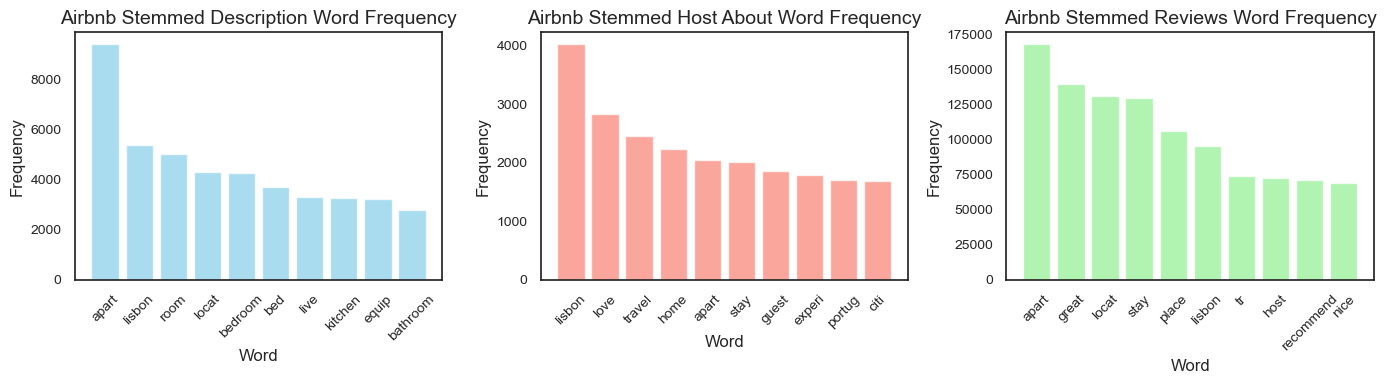

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), facecolor='none')

description_words = ' '.join(df_train_merged_clean['description_stemming']).split()
host_about_words = ' '.join(df_train_merged_clean['host_about_stemming']).split()
comments_words = ' '.join(df_train_merged_clean['comments_stemming']).split()

word_freq(description_words, 'Airbnb Stemmed Description Word Frequency', 0, 'skyblue', axes)
word_freq(host_about_words, 'Airbnb Stemmed Host About Word Frequency', 1, 'salmon', axes)
word_freq(comments_words, 'Airbnb Stemmed Reviews Word Frequency', 2, 'lightgreen', axes)
plt.tight_layout()
plt.show()

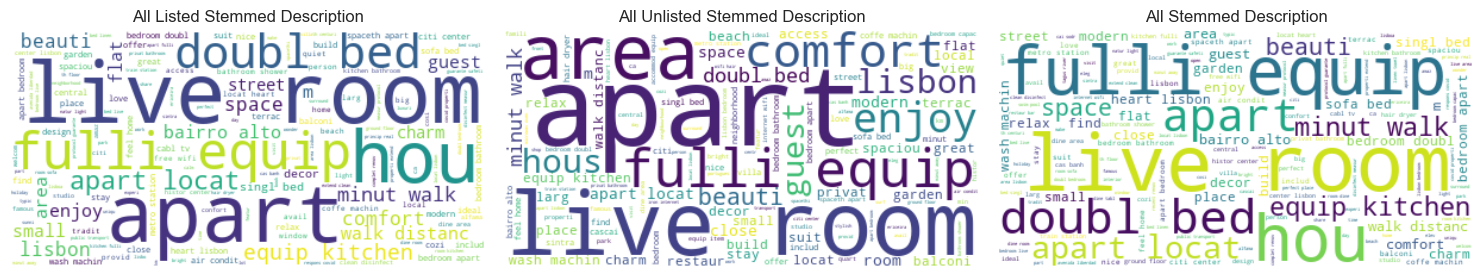

In [65]:
listed_properties_stemming = df_train_merged_clean[df_train_merged_clean['unlisted'] == 0]
unlisted_properties_stemming = df_train_merged_clean[df_train_merged_clean['unlisted'] == 1]

text_sources_clean = {
    'All Listed Stemmed Description': ' '.join(map(str, listed_properties_stemming['description_stemming'])),
    'All Unlisted Stemmed Description': ' '.join(map(str, unlisted_properties_stemming['description_stemming'])),
    'All Stemmed Description': ' '.join(map(str, df_train_merged_clean['description_stemming']))
}
wordCloud(text_sources_clean)

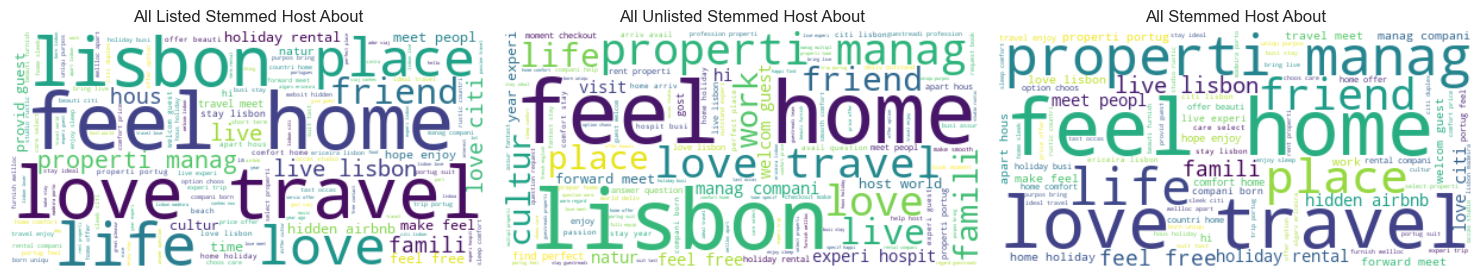

In [66]:
text_sources_clean = {
    'All Listed Stemmed Host About': ' '.join(map(str, listed_properties_stemming['host_about_stemming'])),
    'All Unlisted Stemmed Host About': ' '.join(map(str, unlisted_properties_stemming['host_about_stemming'])),
    'All Stemmed Host About': ' '.join(map(str, df_train_merged_clean['host_about_stemming']))
}

wordCloud(text_sources_clean)

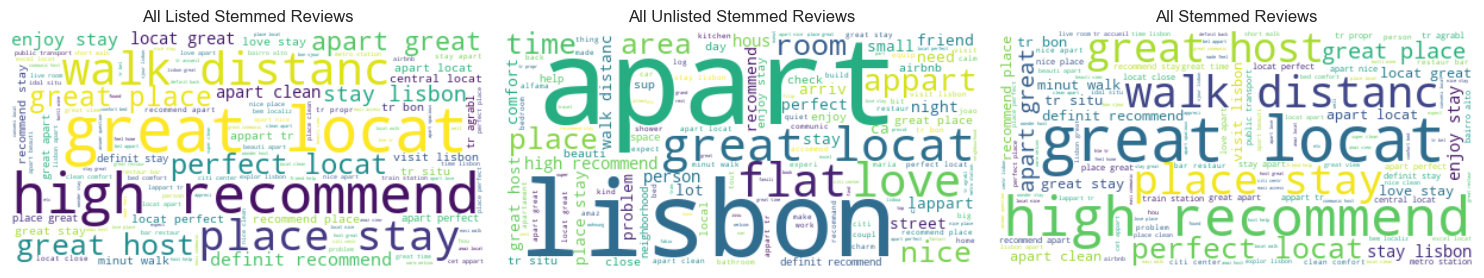

In [67]:
text_sources_clean = {
    'All Listed Stemmed Reviews': ' '.join(map(str, listed_properties_stemming['comments_stemming'])),
    'All Unlisted Stemmed Reviews': ' '.join(map(str, unlisted_properties_stemming['comments_stemming'])),
    'All Stemmed Reviews': ' '.join(map(str, df_train_merged_clean['comments_stemming']))
}

wordCloud(text_sources_clean)

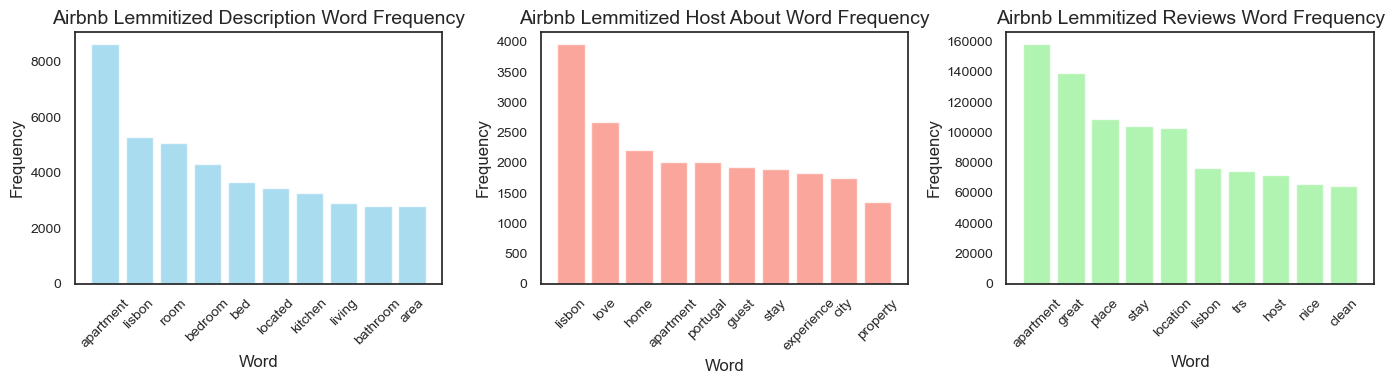

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), facecolor='none')

# Convert float values to strings before joining
description_words = ' '.join(map(str, df_train_merged_clean['description_lemmitize'])).split()
host_about_words = ' '.join(map(str, df_train_merged_clean['host_about_lemmitize'])).split()
comments_words = ' '.join(map(str, df_train_merged_clean['comments_lemmitize'])).split()



word_freq(description_words, 'Airbnb Lemmitized Description Word Frequency', 0, 'skyblue', axes)
word_freq(host_about_words, 'Airbnb Lemmitized Host About Word Frequency', 1, 'salmon', axes)
word_freq(comments_words, 'Airbnb Lemmitized Reviews Word Frequency', 2, 'lightgreen', axes)
plt.tight_layout()
plt.show()

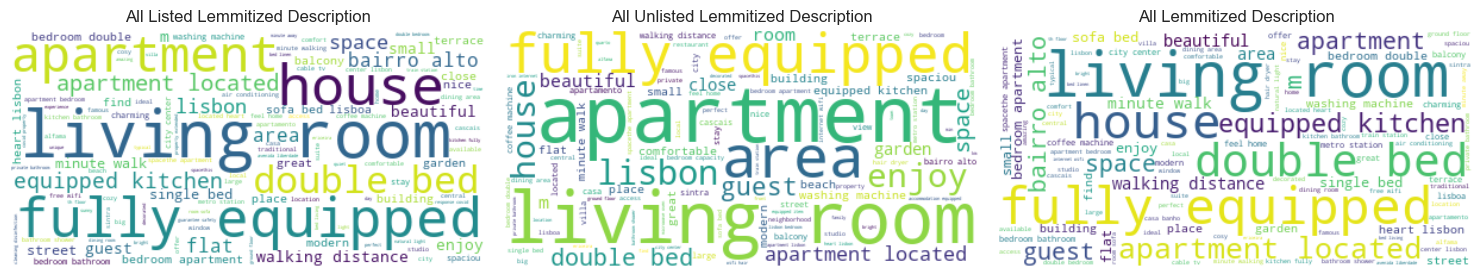

In [69]:
text_sources_clean = {
    'All Listed Lemmitized Description': ' '.join(map(str, listed_properties_stemming['description_lemmitize'])),
    'All Unlisted Lemmitized Description': ' '.join(map(str, unlisted_properties_stemming['description_lemmitize'])),
    'All Lemmitized Description': ' '.join(map(str, df_train_merged_clean['description_lemmitize']))
}

wordCloud(text_sources_clean)

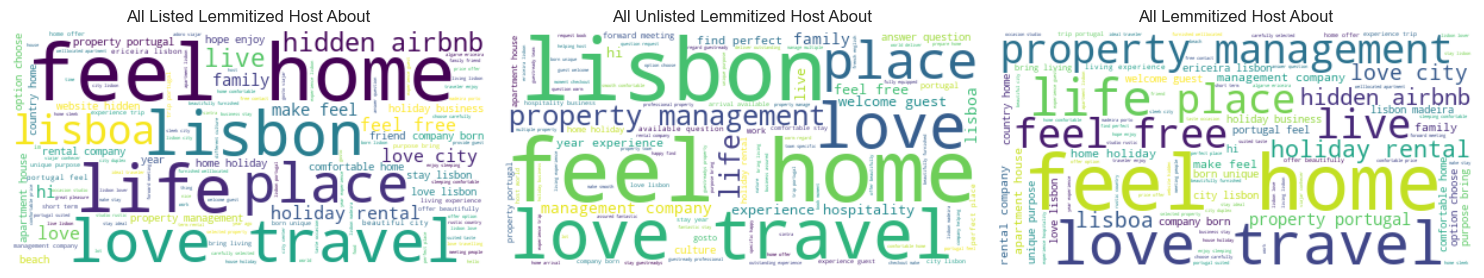

In [70]:
text_sources_clean = {
    'All Listed Lemmitized Host About': ' '.join(map(str, listed_properties_stemming['host_about_lemmitize'])),
    'All Unlisted Lemmitized Host About': ' '.join(map(str, unlisted_properties_stemming['host_about_lemmitize'])),
    'All Lemmitized Host About': ' '.join(map(str, df_train_merged_clean['host_about_lemmitize']))
}

wordCloud(text_sources_clean)

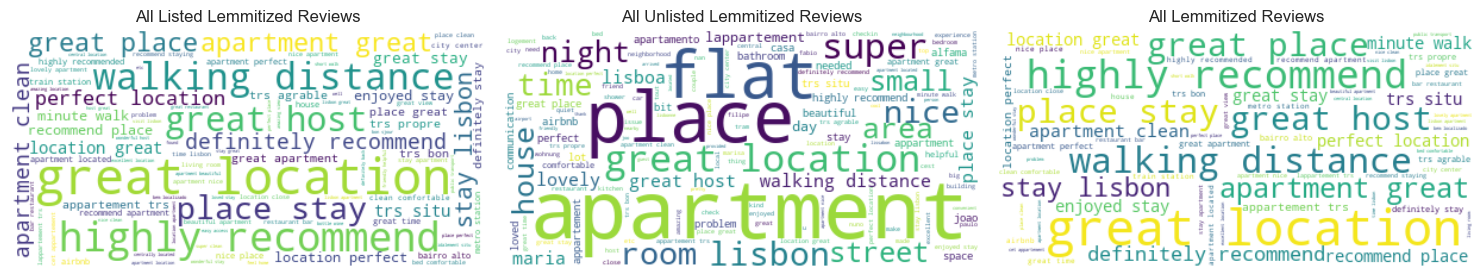

In [71]:
text_sources_clean = {
    'All Listed Lemmitized Reviews': ' '.join(map(str, listed_properties_stemming['comments_lemmitize'])),
    'All Unlisted Lemmitized Reviews': ' '.join(map(str, unlisted_properties_stemming['comments_lemmitize'])),
    'All Lemmitized Reviews': ' '.join(map(str, df_train_merged_clean['comments_lemmitize']))
}

wordCloud(text_sources_clean)